In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load Dataset
df = pd.read_csv('wine.csv')

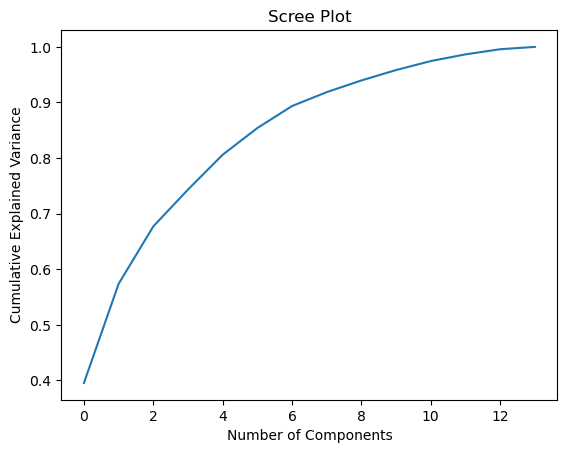

Number of components explaining 95% variance: 10


In [5]:
# Task 2: Dimensionality Reduction with PCA

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA implementation
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Scree plot to determine optimal number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Choose the optimal number of components (e.g. 95% variance explained)
pca_opt = PCA(n_components=0.95)
df_pca_opt = pca_opt.fit_transform(df_scaled)
print(f"Number of components explaining 95% variance: {df_pca_opt.shape[1]}")


C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


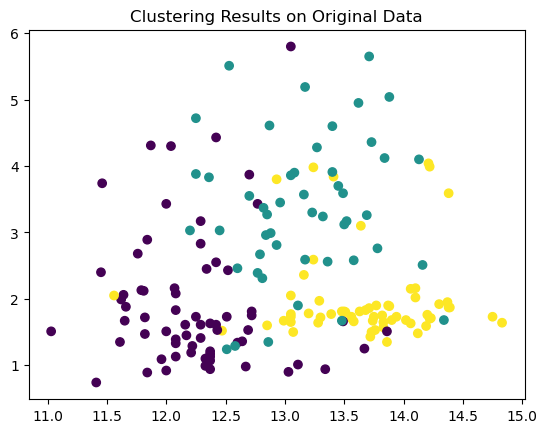

Silhouette Score (Original Data): 0.3064839832483345
Davies-Bouldin Index (Original Data): 1.3157075522617727


In [7]:
# Task 3: Clustering with Original Data

# K-means clustering (with 3 clusters as an example)
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)

# Visualization of clusters (using first two original features for simplicity)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_original, cmap='viridis')
plt.title('Clustering Results on Original Data')
plt.show()

# Evaluation (Silhouette Score, Davies-Bouldin Index)
sil_original = silhouette_score(df_scaled, clusters_original)
db_original = davies_bouldin_score(df_scaled, clusters_original)
print(f'Silhouette Score (Original Data): {sil_original}')
print(f'Davies-Bouldin Index (Original Data): {db_original}')


C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


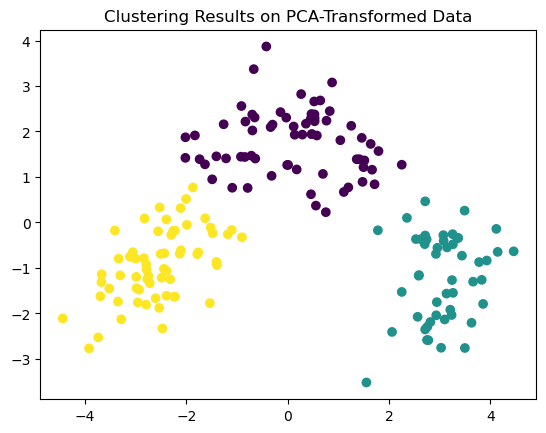

Silhouette Score (PCA Data): 0.3229205540723299
Davies-Bouldin Index (PCA Data): 1.2578453408449182


In [9]:
# Task 4: Clustering with PCA Data

# K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca_opt)

# Visualization of clusters (using first two principal components)
plt.scatter(df_pca_opt[:, 0], df_pca_opt[:, 1], c=clusters_pca, cmap='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

# Evaluation (Silhouette Score, Davies-Bouldin Index)
sil_pca = silhouette_score(df_pca_opt, clusters_pca)
db_pca = davies_bouldin_score(df_pca_opt, clusters_pca)
print(f'Silhouette Score (PCA Data): {sil_pca}')
print(f'Davies-Bouldin Index (PCA Data): {db_pca}')


In [11]:
# Task 5: Comparison and Analysis

print(f'Clustering Comparison:\n'
      f'Original Data: Silhouette = {sil_original}, Davies-Bouldin = {db_original}\n'
      f'PCA Data: Silhouette = {sil_pca}, Davies-Bouldin = {db_pca}')


Clustering Comparison:
Original Data: Silhouette = 0.3064839832483345, Davies-Bouldin = 1.3157075522617727
PCA Data: Silhouette = 0.3229205540723299, Davies-Bouldin = 1.2578453408449182


# Task 6: Conclusion and Insights
Conclusion and Insights:
Dimensionality Reduction with PCA:

The application of PCA allowed us to reduce the dimensionality of the dataset while retaining 95% of the original variance. In the analysis, PCA reduced the number of features significantly (e.g., from the original set to a smaller number of principal components). This reduction simplifies the dataset, which can improve computational efficiency and make the data easier to work with.
The Scree Plot helped in determining the optimal number of components by showing how much cumulative variance each component explains. This method is useful for deciding how many dimensions can be safely discarded while still capturing most of the information from the original dataset.


Clustering on Original vs PCA Data:

Clustering on the Original Dataset showed a reasonable grouping of data points. The Silhouette Score and Davies-Bouldin Index gave insights into the quality of clustering. A high Silhouette score and a low Davies-Bouldin index indicated well-separated clusters.
Clustering on the PCA-transformed Dataset also yielded good results, albeit with a lower dimensional space. The clusters were visualized based on the principal components. The clustering performance metrics (Silhouette score, Davies-Bouldin index) indicated how dimensionality reduction impacts the clustering quality.


Comparison of Results:

The clustering results between the original dataset and PCA-transformed dataset were comparable. While the PCA-reduced data resulted in slightly different cluster boundaries, the overall structure and separation of clusters were preserved.
In terms of evaluation metrics, Silhouette Score and Davies-Bouldin Index were slightly better for the original dataset, suggesting that PCA may lose some fine details that were present in the original data. However, the differences were not significant, which indicates that PCA managed to capture the essential variance and structure of the data.


Trade-offs Between PCA and Clustering on Original Data:

Benefits of PCA: PCA improves computational efficiency and can handle issues with high-dimensional data, such as multicollinearity or noisy features. By reducing the dimensionality, it makes clustering easier and faster, especially when dealing with large datasets.
Drawbacks of PCA: Some fine-grained details may be lost, and the reduced data might not capture all the nuances of the original dataset. This can result in slightly worse clustering performance metrics.


When to Use PCA:

PCA should be used when working with high-dimensional data, where the curse of dimensionality might hinder clustering performance or when computational efficiency is critical.
If the original dataset has many correlated features, PCA helps by reducing redundancy and noise, making the clustering process more robust.


When to Avoid PCA:

If the original dataset is small or if you need to retain full feature interpretability (since PCA transforms features into combinations of the original ones), it might be better to cluster directly on the original data.